In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
!wget https://github.com/jishubasak/Regression-Models/blob/master/china_gdp.csv

--2020-12-12 04:15:28--  https://github.com/jishubasak/Regression-Models/blob/master/china_gdp.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘china_gdp.csv.1’

china_gdp.csv.1         [ <=>                ] 102.70K  --.-KB/s    in 0.03s   

2020-12-12 04:15:28 (3.52 MB/s) - ‘china_gdp.csv.1’ saved [105161]



In [ ]:
df=pd.read_csv('/content/china_gdp.csv' , error_bad_lines=False)

df.columns

Index(['Year', 'Value'], dtype='object')

In [ ]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


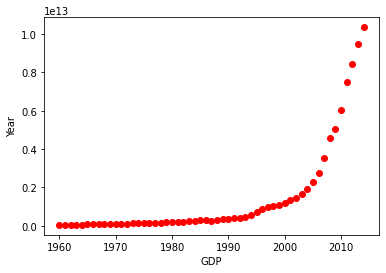

In [ ]:
X, y = (df['Year'].values, df['Value'].values)
plt.plot(X, y, 'ro')
plt.ylabel('Year')
plt.xlabel('GDP')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train.reshape(-1,1))
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

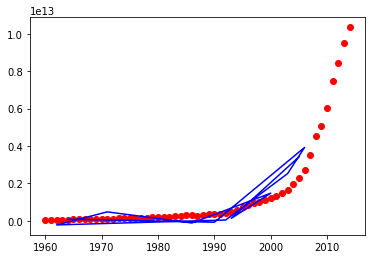

In [ ]:
plt.scatter(X, y, color='red')
plt.plot(X_test, pol_reg.predict(poly_reg.fit_transform(X_test.reshape(-1,1))), color='blue')
plt.show()

In [ ]:
# Predicting a new result with Polymonial Regression
ans = pol_reg.predict(poly_reg.fit_transform([[2009]]))

In [ ]:
theta0 = pol_reg.intercept_
_, theta1, theta2, theta3 = pol_reg.coef_
theta0, theta1, theta2

(-2.0783871409195802e+18, 3150650113844782.5, -1592007201870.672)

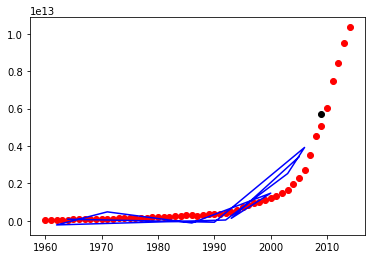

In [ ]:
plt.scatter(2009, ans, c = "black")
plt.scatter(X, y, color='red')
plt.plot(X_test, pol_reg.predict(poly_reg.fit_transform(X_test.reshape(-1,1))), color='blue')
plt.show()

In [ ]:
#prediction on traing dataset

train_pred = pol_reg.predict(poly_reg.fit_transform(X_train.reshape(-1,1)))
#evaluate model on training data
rmse_train = np.sqrt(mean_squared_error(y_train,train_pred))
r2_train = r2_score(y_train,train_pred)


rmse_train, r2_train


(426072258464.18427, 0.9753533479502664)

In [ ]:
#On test data
test_pre = pol_reg.predict(poly_reg.fit_transform(X_test.reshape(-1,1)))
rmse_test =  np.sqrt(mean_squared_error(y_test,test_pre))
r2_test = r2_score(y_test,test_pre)

rmse_test, r2_test

(632998940426.0729, 0.5121171365650213)

In [ ]:
l_train_pred= model.predict(X_train.reshape(-1,1))
print(np.sqrt(mean_squared_error(X_train,l_train_pred)))
print(r2_score(y_train, l_train_pred))

l_test_pred= model.predict(X_test.reshape(-1,1))
print(np.sqrt(mean_squared_error(X_test,l_test_pred)))
print(r2_score(y_test, l_test_pred))

In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(X_train.reshape(-1,1), y_train) 
pred_train_rr= rr.predict(X_train.reshape(-1,1))
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test.reshape(-1,1))
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

In [ ]:
df = pd.read_csv('PCE.csv') 
print(df.shape)
df.describe()
df.columns

In [ ]:
predictors = ['PCE','POP','PSAVERT']
target_column = ['UNEMPLOY']

In [ ]:
X = df[predictors].values
y = df[target_column].values



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

In [ ]:
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))


In [ ]:
c = pd.read_csv('ChurnData.csv')
c.head()

In [ ]:
churn_df = c[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

In [ ]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churn_df['churn'])
y [0:5]

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

In [ ]:
yhat = LR.predict(X_test)
yhat

In [ ]:
LR.score(X_test,y_test)

In [ ]:
LR.predict_proba(X_test)

In [ ]:
cm = confusion_matrix(y_test, LR.predict(X_test))
cm

In [ ]:
cm = confusion_matrix(y_test, LR.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
model_lasso = Lasso(alpha=0.05)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))